# 1. Titanic - Machine Learning from Disaster

## a. Insights from Other Notebook
1. Variables explanation
    - `Sibsp` is the number of slibings or spouses travelling with the passenger
    - `Parch` is the number of parents of children travelling with the passenger
    - `Embarked` representing by the first letter of Cherbourg, Queenstown and Southampton

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
# preview first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# read columns name
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Cleaning
- For the age columns, there are some missing values, passengers' titles are derived to get an insight of their age distribution by applying the median age for each title. 

In [6]:
# see the non-numeric columns
categorical = [var for var in train.columns if train[var].dtype=='O']
train[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [7]:
# check for null
train[categorical].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# check the category values distribution
for var in categorical: 
    print(train[var].value_counts()/np.float(len(train)))

Braund, Mr. Owen Harris                     0.001122
Boulos, Mr. Hanna                           0.001122
Frolicher-Stehli, Mr. Maxmillian            0.001122
Gilinski, Mr. Eliezer                       0.001122
Murdlin, Mr. Joseph                         0.001122
                                              ...   
Kelly, Miss. Anna Katherine "Annie Kate"    0.001122
McCoy, Mr. Bernard                          0.001122
Johnson, Mr. William Cahoone Jr             0.001122
Keane, Miss. Nora A                         0.001122
Dooley, Mr. Patrick                         0.001122
Name: Name, Length: 891, dtype: float64
male      0.647587
female    0.352413
Name: Sex, dtype: float64
347082      0.007856
CA. 2343    0.007856
1601        0.007856
3101295     0.006734
CA 2144     0.006734
              ...   
9234        0.001122
19988       0.001122
2693        0.001122
PC 17612    0.001122
370376      0.001122
Name: Ticket, Length: 681, dtype: float64
B96 B98        0.004489
G6             0

/tmp/ipykernel_20/89510089.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts()/np.float(len(train)))
/tmp/ipykernel_20/89510089.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts()/np.float(len(train)))
/tmp/ipykernel_20/89510089.py:3: DeprecationWarning: `np.float` is a depre

In [9]:
# check for cardinality
for var in categorical:
    print(var, ' contains ', len(train[var].unique()), ' labels')

Name  contains  891  labels
Sex  contains  2  labels
Ticket  contains  681  labels
Cabin  contains  148  labels
Embarked  contains  4  labels


In [10]:
title = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]
train['title'] = pd.Series(title)
train['title'].head(4)

0      Mr
1     Mrs
2    Miss
3     Mrs
Name: title, dtype: object

In [11]:
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

We can see that there are some rare titles such as Col, the Coutess and so on af if for nobility and people with some rankings. We will group these titles together

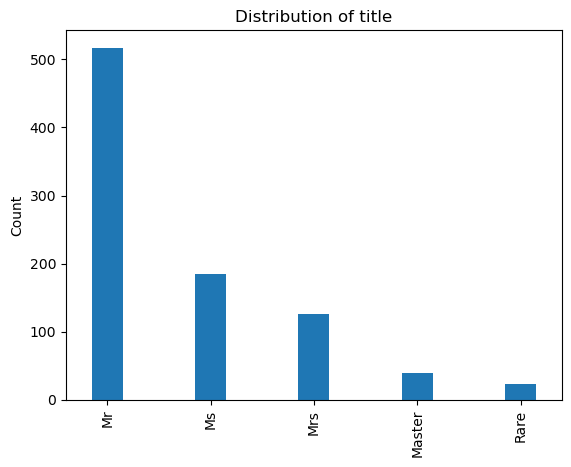

In [12]:
train['title'] = train['title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['title'] = train['title'].replace(['Miss', 'Ms', 'Mlle'],'Ms')
train['title'] = train['title'].replace(['Mrs', 'Mme'], 'Mrs')

train['title'].value_counts().plot(kind = 'bar', width = 0.3)
plt.title("Distribution of title")
plt.ylabel('Count')
plt.show()

In [13]:
# fill up the age using the title based median
train.loc[(train['title'] == 'Mr') & (train['Age'].isnull()), 'Age'] = train[train['title'] == 'Mr']['Age'].median()
train.loc[(train['title'] == 'Ms') & (train['Age'].isnull()), 'Age'] = train[train['title'] == 'Ms']['Age'].median()
train.loc[(train['title'] == 'Mrs') & (train['Age'].isnull()), 'Age'] = train[train['title'] == 'Mrs']['Age'].median()
train.loc[(train['title'] == 'Master') & (train['Age'].isnull()), 'Age'] = train[train['title'] == 'Master']['Age'].median()
train.loc[(train['title'] == 'Rare') & (train['Age'].isnull()), 'Age'] = train[train['title'] == 'Rare']['Age'].median()

In [14]:
train['Age'].isnull().sum()

0

In [15]:
# check for other columsn with null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

- How to fill up the cabin empty cells
    - There are more first class ticket fare
    - Since first class ticket cost more, the passengers will recieve more quality and safety ride

In [16]:
new1 = pd.Series(train.loc[train['Pclass'] == 1]['Fare'])
new2 = pd.Series(train.loc[train['Pclass'] == 2]['Fare'])
new3 = pd.Series(train.loc[train['Pclass'] == 3]['Fare'])

new_t = pd.DataFrame(
    {'Class 1': new1,
    'Class 2': new2,
    'Class 3': new3,}
                    )
new_t.describe()

,Class 1,Class 2,Class 3
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


In [17]:
p1_survival = train[(train['Pclass'] == 1) & (train['Fare'] <= 512.329200)]
p1_survival['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [18]:
p1_survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Ms
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr


In [19]:
# impute NaN values values equally distributed with cabins
# based on first calss, high fare and first class passenger cabins
# who were died in 1st class

p1_died_null_cabin = p1_survival[(p1_survival['Survived'] == 0) & (p1_survival['Cabin'].isnull())]
print(len(p1_died_null_cabin))

for i in p1_died_null_cabin.index.to_list():
    if i <= 5:
        train.loc[i, 'Cabin'] = 'C30'
    elif (i > 5) & (i <= 10):
        train.loc[i, 'Cabin'] = 'C110'
    elif (i > 10) & (i <= 15):
        train.loc[i, 'Cabin'] = 'B94'
    else:
        train.loc[i, 'Cabin'] = 'E44'

21


In [20]:
p1_alive_null_cabin = p1_survival[(p1_survival['Survived'] ==1) & (p1_survival['Cabin'].isnull())]
for i in p1_alive_null_cabin.index.to_list():
    if i>=5:
        train.loc[i,'Cabin'] = 'B96 B98'
    elif (i>5) & (i<=10):
        train.loc[i,'Cabin'] = 'E40'
    elif (i>10) & (i<=15):
        train.loc[i,'Cabin'] = 'E34'
    else:
        train.loc[i,'Cabin'] = 'C7'
        
print(len(p1_alive_null_cabin))

19


In [21]:
# impute NaN values values equally distributed with cabins
# based on first calss, high fare and 2nd class passenger cabins
# who were died in 2nd class

p2_survival = train[(train['Pclass'] == 2) & (train['Fare'] <= 73.500000)]
print(p2_survival['Survived'].value_counts())
print(p2_survival[p2_survival['Survived'] == 0]['Cabin'].value_counts())
print(p2_survival[p2_survival['Survived'] == 1]['Cabin'].value_counts())

0    97
1    87
Name: Survived, dtype: int64
F2     1
D      1
E77    1
Name: Cabin, dtype: int64
F33     3
E101    3
F4      2
F2      2
D       2
D56     1
Name: Cabin, dtype: int64


In [22]:
p2_died_null_cabin =p2_survival[(p2_survival['Survived'] == 0) & (p2_survival['Cabin'].isnull())]
for i in p2_died_null_cabin.index.to_list():
    if i<=61:
        train.loc[i,'Cabin'] = 'F2'
    elif (i>61) & (i<=122):
        train.loc[i,'Cabin'] = 'D'
    else:
        train.loc[i,'Cabin'] = 'E77'

In [23]:
p2_alive_null_cabin = p2_survival[(p2_survival['Survived'] == 1) & (p2_survival['Cabin'].isnull())]
for i in p2_alive_null_cabin.index.to_list():
    if i<=15:
        train.loc[i,'Cabin'] = 'F33'
    elif (i>15) & (i<=30):
        train.loc[i,'Cabin'] = 'E101'
    elif (i>30) & (i<=40):
        train.loc[i,'Cabin'] = 'F4'
    elif (i>40) & (i<=50):
        train.loc[i,'Cabin'] = 'F2'
    elif (i>50) & (i<=60):
        train.loc[i,'Cabin'] = 'D'
    else:
        train.loc[i,'Cabin'] = 'D56'

In [24]:
p3_survival = train[(train['Pclass'] == 3) & (train['Fare'] <= 69.550000)]
print(p3_survival['Survived'].value_counts())
print(p3_survival[p3_survival['Survived'] == 0]['Cabin'].value_counts())
print(p3_survival[p3_survival['Survived'] == 1]['Cabin'].value_counts())

0    372
1    119
Name: Survived, dtype: int64
F G73    2
G6       2
F G63    1
F38      1
Name: Cabin, dtype: int64
G6       2
E121     2
F E69    1
E10      1
Name: Cabin, dtype: int64


In [25]:
p3_died_null_cabin = p3_survival[(p3_survival['Survived'] == 0) & (p3_survival['Cabin'].isnull())]
for i in p3_died_null_cabin.index.to_list():
    if i<=122:
        train.loc[i,"Cabin"]="G6"
    elif (i>122) & (i<=244):
        train.loc[i,'Cabin']='G6'
    elif (i>244) & (i<=305):
        train.loc[i,'Cabin']='F G63'
    else:
        train.loc[i,'Cabin']='F38'

In [26]:
p3_alive_null_cabin = p3_survival[(p3_survival['Survived'] == 1) & (p3_survival['Cabin'].isnull())]
for i in p3_alive_null_cabin.index.to_list():
    if i<=38:
        train.loc[i,"Cabin"]="F G73"
    elif (i>38) & (i<=76):
        train.loc[i,'Cabin']='E121'
    elif (i>76) & (i<=95):
        train.loc[i,'Cabin']='F E69'
    else:
        train.loc[i,'Cabin']='E10'

In [27]:
# verify null columns
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
title          0
dtype: int64

In [28]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
# filling embarked null values with least onboarded location:
train['Embarked'].replace(np.nan,'Q',inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
title          0
dtype: int64

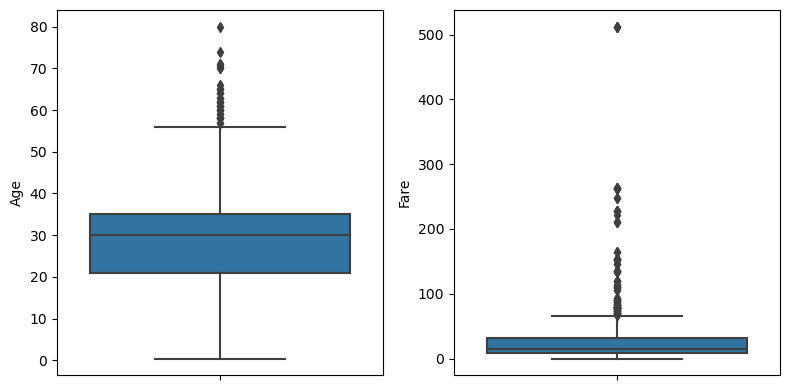

In [30]:
# outliers detection
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.boxplot(data=train,y='Age')
plt.subplot(1,2,2)
sns.boxplot(data=train,y='Fare')
plt.tight_layout()
plt.show()

In [31]:
train['Age'].describe()

count    891.000000
mean      29.392447
std       13.268389
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, '6. Distribution of survival with respect to Pclass')

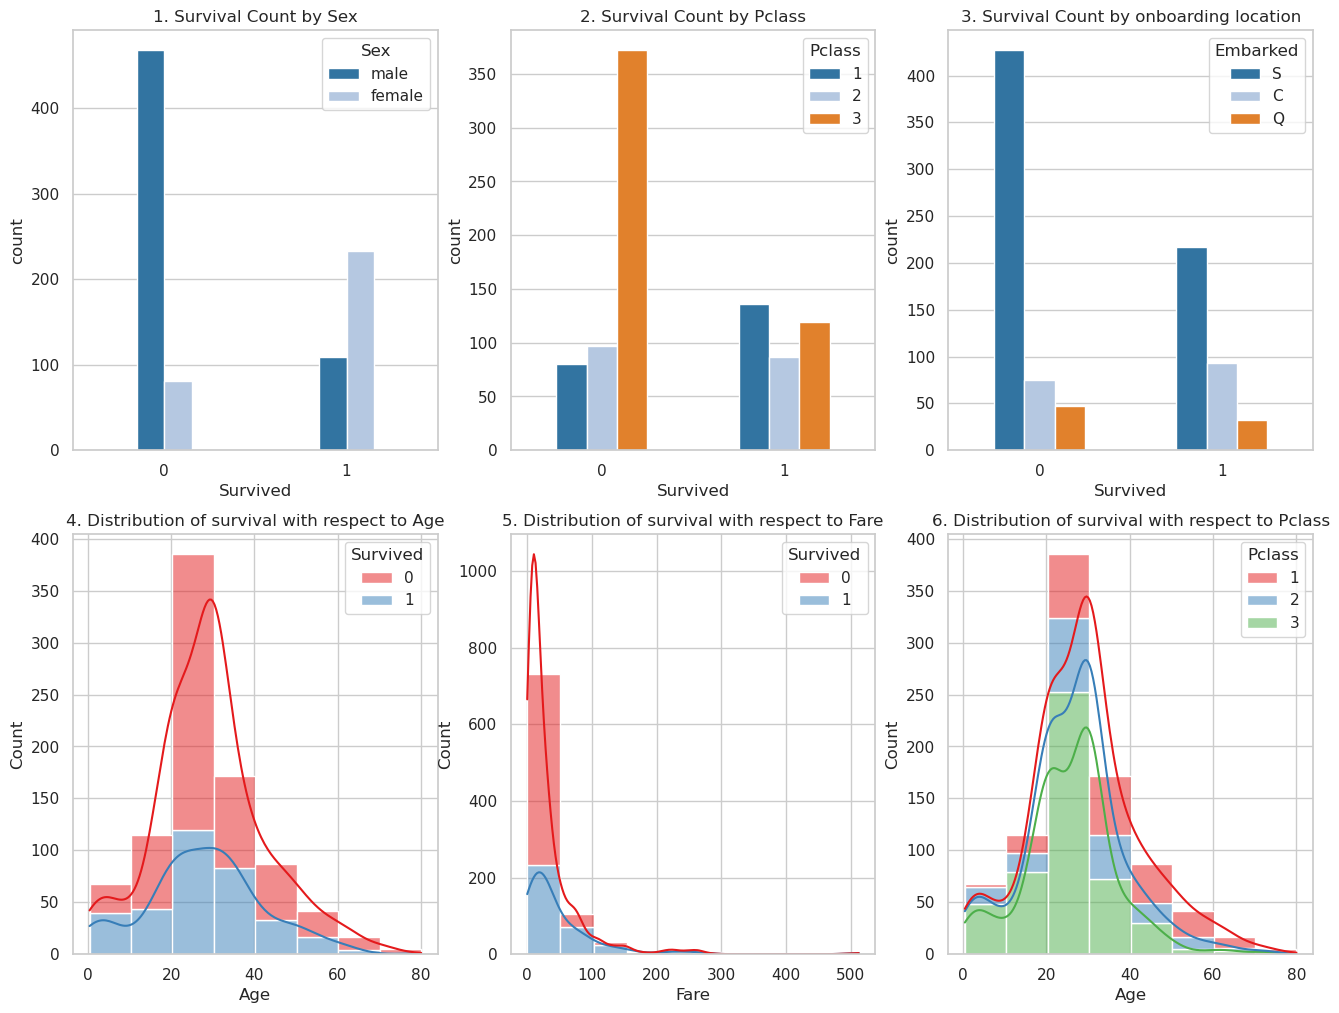

In [32]:
# predictor and target variable
sns.set(style="whitegrid") 
plt.figure(figsize=(16,12))

# sex vs survival rate:
plt.subplot(2,3,1)
sns.countplot(train,x='Survived',hue='Sex',palette='tab20',width=0.3)
plt.title('1. Survival Count by Sex')

# Passenger class vs survival rate:
plt.subplot(2,3,2)
sns.countplot(x="Survived", hue="Pclass", data=train, palette="tab20",width=0.5)
plt.title('2. Survival Count by Pclass')

# Siblings vs survival rate:
plt.subplot(2,3,3)
sns.countplot(x="Survived", hue="Embarked", data=train, palette="tab20",width=0.5)
plt.title('3. Survival Count by onboarding location')

# Onboarding location vs survival rate:
plt.subplot(2,3,4)
sns.histplot(data=train,x='Age',hue='Survived',bins=8,multiple='stack',kde=True, palette='Set1')
plt.title('4. Distribution of survival with respect to Age')

# Age vs survival rate:
plt.subplot(2,3,5)
sns.histplot(data=train, x="Fare", hue="Survived", bins=10,multiple='stack',kde=True,palette='Set1')
plt.title('5. Distribution of survival with respect to Fare')

# Ticket Fare vs survival rate:
plt.subplot(2,3,6)
sns.histplot(train, x='Age', hue='Pclass',bins=8,multiple='stack',kde=True,palette='Set1')
plt.title('6. Distribution of survival with respect to Pclass')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


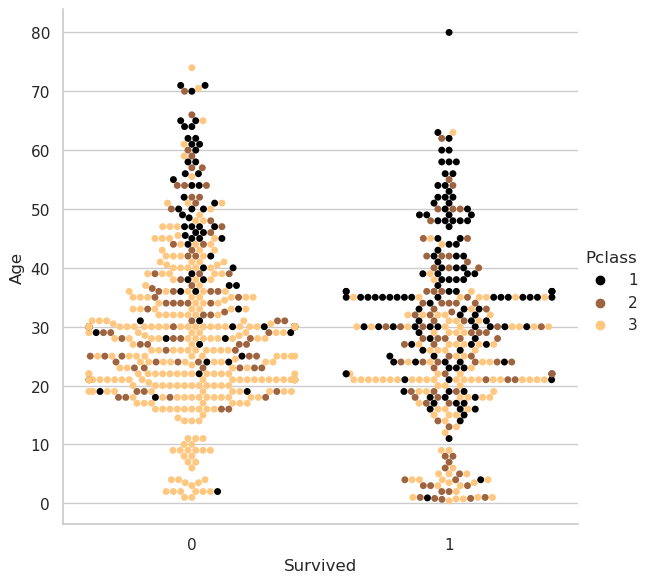

In [33]:
sns.catplot(train,x='Survived',y='Age',hue='Pclass',kind='swarm',height=6,palette='copper')

In [34]:
# Scaling for numerical columns:
col_headers=['Age','Fare']
scl = RobustScaler()
train[col_headers] = scl.fit_transform(train[col_headers])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.571429,1,0,A/5 21171,-0.312011,G6,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571429,1,0,PC 17599,2.461242,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.285714,0,0,STON/O2. 3101282,-0.282777,F G73,S,Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.357143,1,0,113803,1.673732,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0.357143,0,0,373450,-0.277363,G6,S,Mr


In [35]:
column_headers = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'title']
le = LabelEncoder()

train[column_headers] = train[column_headers].apply(le.fit_transform)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,108,1,-0.571429,1,0,523,-0.312011,145,2,1
1,2,1,1,190,0,0.571429,1,0,596,2.461242,81,0,2
2,3,1,3,353,0,-0.285714,0,0,669,-0.282777,140,2,3
3,4,1,1,272,0,0.357143,1,0,49,1.673732,55,2,2
4,5,0,3,15,1,0.357143,0,0,472,-0.277363,145,2,1


<Axes: >

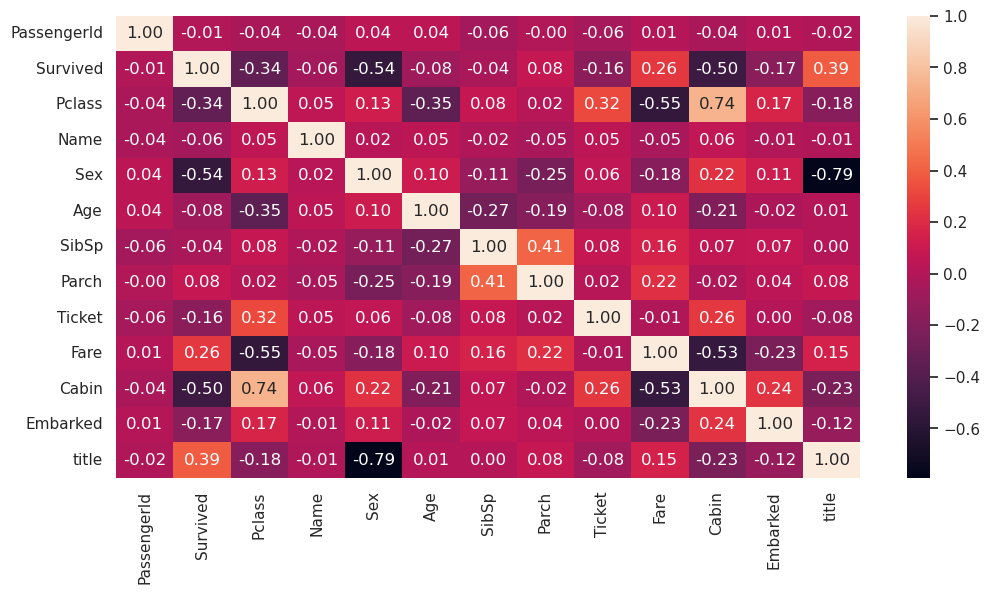

In [36]:
# correlation matrix plot
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), annot = True, fmt = '.2f')

# Test Set Preparation

In [37]:
title = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['title'] = pd.Series(title)
test['title'].head(4)

0     Mr
1    Mrs
2     Mr
3     Mr
Name: title, dtype: object

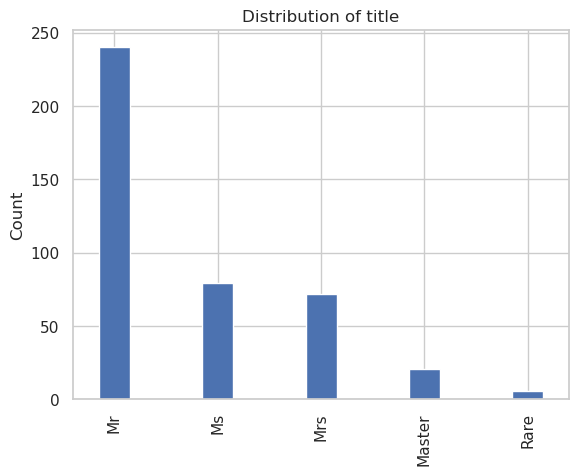

In [38]:
test['title'] = test['title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test['title'] = test['title'].replace(['Miss', 'Ms', 'Mlle'],'Ms')
test['title'] = test['title'].replace(['Mrs', 'Mme'], 'Mrs')

test['title'].value_counts().plot(kind = 'bar', width = 0.3)
plt.title("Distribution of title")
plt.ylabel('Count')
plt.show()

In [39]:
# fill up the age using the title based median
test.loc[(test['title'] == 'Mr') & (test['Age'].isnull()), 'Age'] = test[test['title'] == 'Mr']['Age'].median()
test.loc[(test['title'] == 'Ms') & (test['Age'].isnull()), 'Age'] = test[test['title'] == 'Ms']['Age'].median()
test.loc[(test['title'] == 'Mrs') & (test['Age'].isnull()), 'Age'] = test[test['title'] == 'Mrs']['Age'].median()
test.loc[(test['title'] == 'Master') & (test['Age'].isnull()), 'Age'] = test[test['title'] == 'Master']['Age'].median()
test.loc[(test['title'] == 'Rare') & (test['Age'].isnull()), 'Age'] = test[test['title'] == 'Rare']['Age'].median()

In [40]:
# filling embarked null values with least onboarded location:
test['Embarked'].replace(np.nan,'Q',inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            0
dtype: int64

In [41]:
# Scaling for numerical columns:
col_headers=['Age','Fare']
scl = RobustScaler()
test[col_headers] = scl.fit_transform(test[col_headers])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,0.413793,0,0,330911,-0.280670,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.275862,1,0,363272,-0.315800,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,2.310345,0,0,240276,-0.201943,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,-0.103448,0,0,315154,-0.245367,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.448276,1,1,3101298,-0.091793,NaN,S,Mrs


In [42]:
column_headers = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'title']
le = LabelEncoder()

test[column_headers] = test[column_headers].apply(le.fit_transform)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,206,1,0.413793,0,0,152,-0.280670,76,1,1
1,893,3,403,0,1.275862,1,0,221,-0.315800,76,2,2
2,894,2,269,1,2.310345,0,0,73,-0.201943,76,1,1
3,895,3,408,1,-0.103448,0,0,147,-0.245367,76,2,1
4,896,3,178,0,-0.448276,1,1,138,-0.091793,76,2,2


In [43]:
test['Fare'] = test['Fare'].fillna(method = 'bfill')

In [44]:
test['Cabin'] = test['Cabin'].fillna(method = 'bfill')

In [45]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
title          0
dtype: int64

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,206,1,0.413793,0,0,152,-0.280670,76,1,1
1,893,3,403,0,1.275862,1,0,221,-0.315800,76,2,2
2,894,2,269,1,2.310345,0,0,73,-0.201943,76,1,1
3,895,3,408,1,-0.103448,0,0,147,-0.245367,76,2,1
4,896,3,178,0,-0.448276,1,1,138,-0.091793,76,2,2


# Model fitting

In [47]:
X = train.drop(['Survived', 'PassengerId', 'Cabin', 'Ticket'], axis = 1)
y = train['Survived']

In [48]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,108,1,-0.571429,1,0,-0.312011,2,1
1,1,190,0,0.571429,1,0,2.461242,0,2
2,3,353,0,-0.285714,0,0,-0.282777,2,3
3,1,272,0,0.357143,1,0,1.673732,2,2
4,3,15,1,0.357143,0,0,-0.277363,2,1


In [49]:
# Train-test split data:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(solver = 'liblinear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



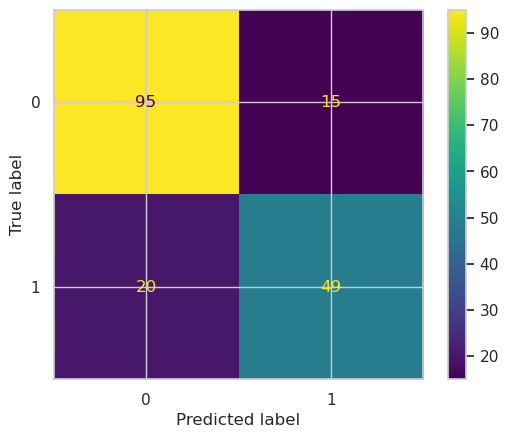

In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [53]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier

In [54]:
algorithms = [
     #GLM
    linear_model.LogisticRegressionCV(solver = 'liblinear'),
    linear_model.PassiveAggressiveClassifier(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    xgboost.XGBClassifier()
    
]

In [55]:
# performance comparison
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in algorithms:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,GradientBoostingClassifier,0.91573,0.84916,0.862069,0.724638,0.825955
12,XGBClassifier,0.99860,0.84916,0.850000,0.739130,0.828656
2,AdaBoostClassifier,0.84972,0.83799,0.794118,0.782609,0.827668
4,RandomForestClassifier,1.00000,0.83799,0.822581,0.739130,0.819565
0,LogisticRegressionCV,0.81882,0.81564,0.764706,0.753623,0.804084
10,BernoulliNB,0.74017,0.81006,0.786885,0.695652,0.788735
11,GaussianNB,0.78792,0.76536,0.670886,0.768116,0.765876
9,DecisionTreeClassifier,1.00000,0.74302,0.676923,0.637681,0.723386
1,PassiveAggressiveClassifier,0.78511,0.73743,0.671875,0.623188,0.716140
7,NuSVC,0.72191,0.67598,0.569620,0.652174,0.671542


# Submission

In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,206,1,0.413793,0,0,152,-0.280670,76,1,1
1,893,3,403,0,1.275862,1,0,221,-0.315800,76,2,2
2,894,2,269,1,2.310345,0,0,73,-0.201943,76,1,1
3,895,3,408,1,-0.103448,0,0,147,-0.245367,76,2,1
4,896,3,178,0,-0.448276,1,1,138,-0.091793,76,2,2


In [57]:
X_valid = test.drop(['PassengerId', 'Cabin', 'Ticket'], axis = 1)
X_valid

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,206,1,0.413793,0,0,-0.280670,1,1
1,3,403,0,1.275862,1,0,-0.315800,2,2
2,2,269,1,2.310345,0,0,-0.201943,1,1
3,3,408,1,-0.103448,0,0,-0.245367,2,1
4,3,178,0,-0.448276,1,1,-0.091793,2,2
...,...,...,...,...,...,...,...,...,...
413,3,353,1,0.000000,0,0,-0.271316,2,1
414,1,283,0,0.724138,0,0,4.001229,0,4
415,3,332,1,0.689655,0,0,-0.305208,2,1
416,3,384,1,0.000000,0,0,-0.271316,2,1


In [58]:
model_f = xgboost.XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
submission = pd.DataFrame(
    {'PassengerId': test['PassengerId'],
     'Survived': pd.Series(y_pred),
    }
)

In [60]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
submission.to_csv('submission.csv', index = False)